# Case Study #2

An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.

1. Find out how many males and females participated in the test.

2. What do you think about the students' parental level of education?

3. Who scores the most on average for math, reading and writing based on
   ● Gender
   ● Test preparation course
   
4. What do you think about the scoring variation for math, reading and writing based on
   ● Gender
   ● Test preparation course
   
5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\91999\Desktop\DataScience\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


**1. Find out how many males and females participated in the test.**

In [8]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

**2. What do you think about the students' parental level of education?**

In [9]:
df1=df['parental level of education'].value_counts()
df1

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [10]:
df2=df[['gender','parental level of education']].value_counts()
df2

gender  parental level of education
female  some college                   118
        associate's degree             116
male    some college                   108
        associate's degree             106
        high school                    102
female  high school                     94
        some high school                91
male    some high school                88
female  bachelor's degree               63
male    bachelor's degree               55
female  master's degree                 36
male    master's degree                 23
dtype: int64

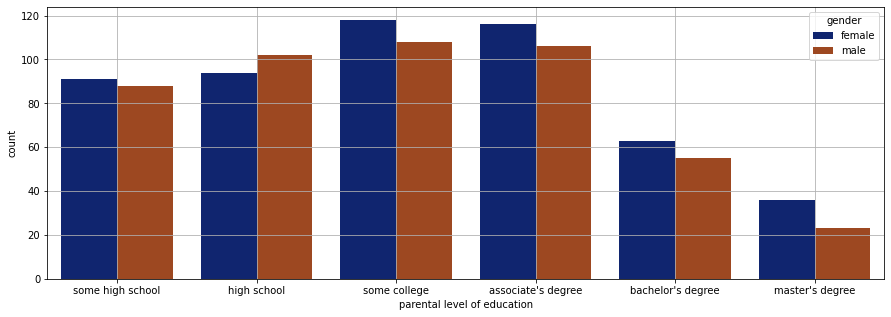

In [36]:
# visualizing the differnt parental education levels
plt.subplots(figsize=(15,5))
sns.countplot(x ='parental level of education', data = df, hue = 'gender', palette = 'dark').grid()
plt.show()


In [12]:
df3=df['parental level of education'].mode()
df3

0    some college
dtype: object

* Most of the students parental level of education is some college level.
* The least number of students parental level of education is masters degree level.

**3. Who scores the most on average for math, reading and writing based on**

    ● Gender

In [13]:
# Average for math, reading and writing
df4=df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().T
df4

gender,female,male
math score,63.376448,68.821577
reading score,72.590734,65.545643
writing score,72.467181,63.446058


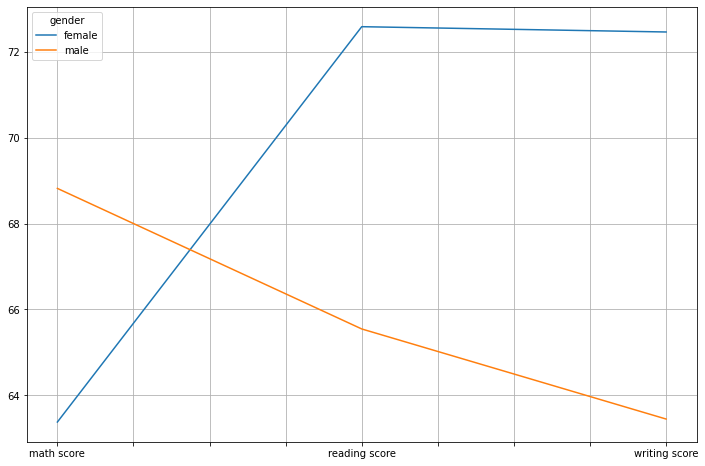

In [35]:
# Plot
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8)).grid()

* Female scores the most on average for reading and writing.
* For male average math score is high but least average for reading and writing.
* from the plot, Female scores the highest average than Male.

    ● Test preparation course

In [15]:
df6=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
df6

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


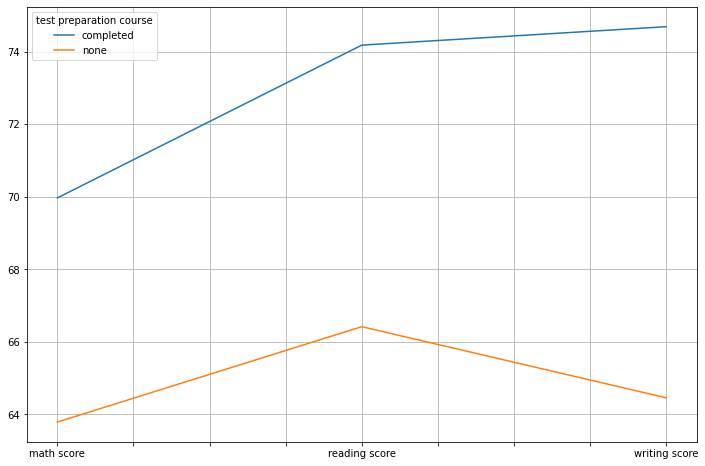

In [34]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8)).grid()

* The people who completed the test preparation course score the most on average for math, reading and writing.
* he people who not completed the test preparation course score the most on average for reading among math and writing.

**4. What do you think about the scoring variation for math, reading and writing based on**

    ● Gender

In [38]:
# Scoring variation for math, reading and writing
df7=df.groupby('gender')[['math score', 'reading score', 'writing score']].aggregate(['min','max','std','var']).T
df7

gender                 female        male
math score    min    0.000000   27.000000
              max  100.000000  100.000000
              std   16.029928   14.556411
              var  256.958593  211.889097
reading score min   17.000000   23.000000
              max  100.000000  100.000000
              std   14.411018   14.149594
              var  207.677438  200.211010
writing score min   10.000000   15.000000
              max  100.000000  100.000000
              std   14.844842   14.227225
              var  220.369327  202.413924

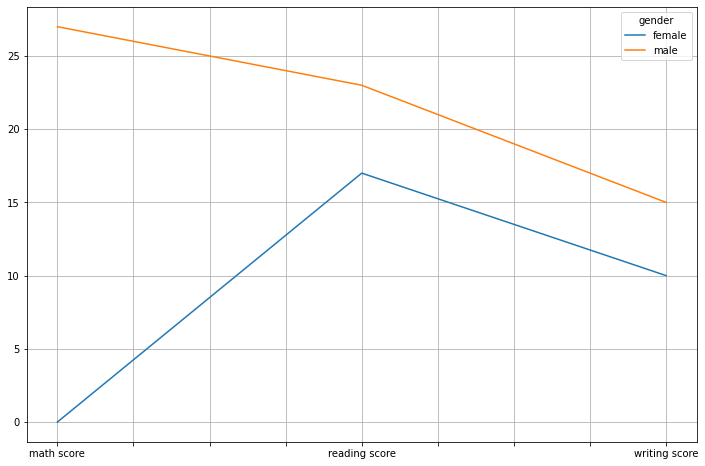

In [33]:
# Plot for min
df.groupby('gender')[['math score', 'reading score', 'writing score']].min().T.plot(figsize=(12,8)).grid()

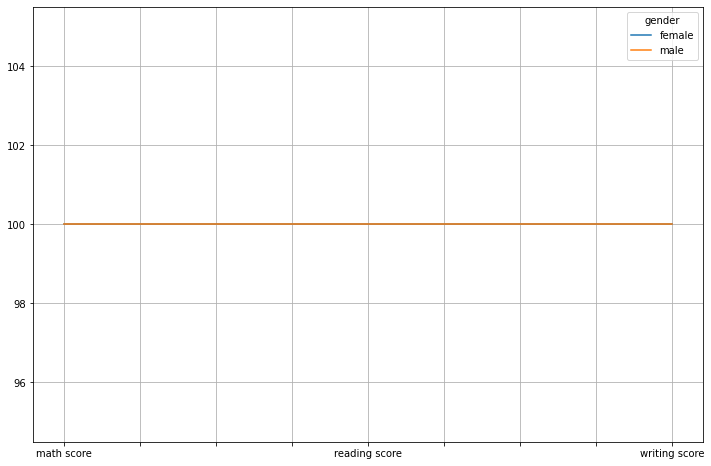

In [32]:
# Plot for max
df.groupby('gender')[['math score', 'reading score', 'writing score']].max().T.plot(figsize=(12,8)).grid()

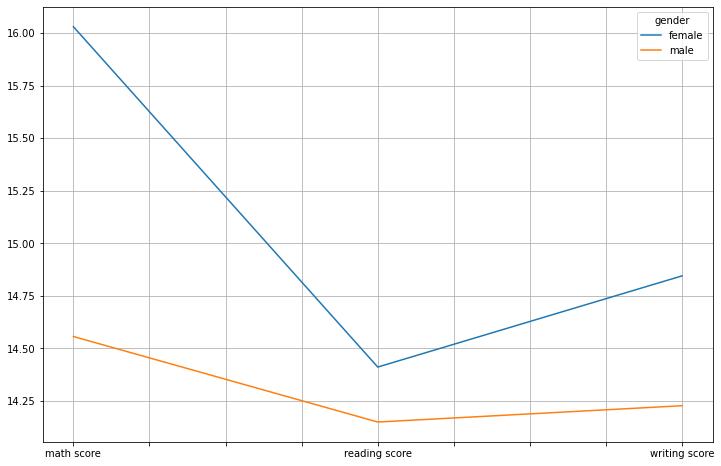

In [31]:
# Plot for score variation
df.groupby('gender')[['math score', 'reading score', 'writing score']].std().T.plot(figsize=(12,8)).grid()

* Score variation for math, reading and writing is high for Female than Male.
* Therefore Male scores follow more  consistency than Female.

    ● Test preparation course

In [42]:
# Scoring variation for math, reading and writing
df8=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].aggregate(['min','max','std','var'])
df8

math score                             reading score  \
                               min  max        std         var           min   
test preparation course                                                        
completed                       23  100  14.521847  210.884027            37   
none                             0  100  15.705689  246.668662            17   

                                                    writing score       \
                         max        std         var           min  max   
test preparation course                                                  
completed                100  13.537572  183.265864            36  100   
none                     100  14.608896  213.419851            10  100   

                                                
                               std         var  
test preparation course                         
completed                13.236412  175.202612  
none                     15.041667  226.251739

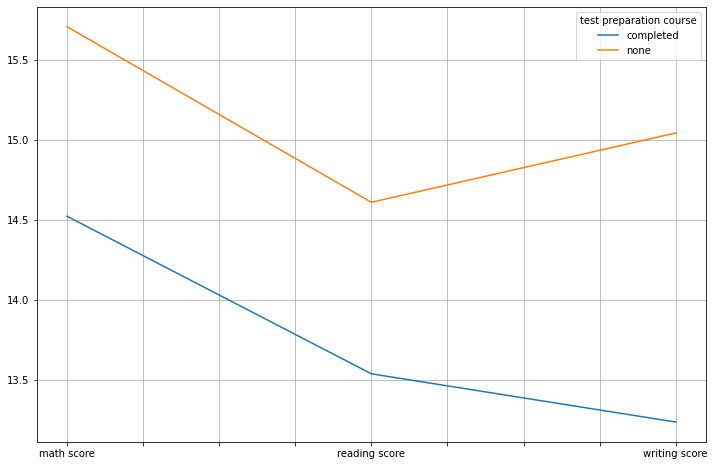

In [47]:
# Plot for score variation
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].std().T.plot(figsize=(12,8)).grid()

* The people who completed the test preparation course score variation is less for math, reading and writing.
* They have high consistecy.
* he people who not completed the test preparation course score variation is high for reading among math and writing due to lack of preperation.

**5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.**

In [48]:
df['gender'].value_counts()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [68]:
df['math score'].median()

66.0

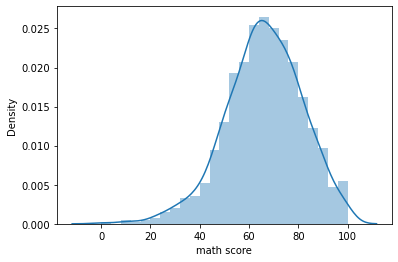

In [74]:
sns.distplot(df['math score'])
plt.show()

In [117]:
dd=df['math score'].sort_values(ascending=False)
dd

999    100
996    100
515    100
517    100
516    100
      ... 
2       18
51      13
3       11
1        8
0        0
Name: math score, Length: 1000, dtype: int64

In [115]:
f.head(25)

999    100
996    100
515    100
517    100
516    100
997    100
998    100
995     99
513     99
514     99
994     98
993     98
512     98
992     97
991     97
989     97
510     97
511     97
990     97
509     96
508     96
988     96
507     95
987     95
505     94
Name: math score, dtype: int64

In [119]:
df9 = pd.DataFrame(df,columns=['gender','math score'])
print(df9)


     gender  math score
0    female           0
1    female           8
2    female          18
3    female          11
4    female          22
..      ...         ...
995    male          99
996    male         100
997    male         100
998    male         100
999    male         100

[1000 rows x 2 columns]


* Males are at the first position for math score*